# 1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
sns.set_theme(style='darkgrid',palette='rainbow')
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# laoding the data
df = pd.read_csv('/Users/shreyasingh/Downloads/Logistic Regression/Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
# Filetring the data by selecting only significant columns 
df = df[['Survived','Pclass','Sex','Age']]
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [7]:
# information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [8]:
# data types of features
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
dtype: object

In [9]:
# missing values in data
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [10]:
# summary statistics of the data for numerical columns
df.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [11]:
# value counts for the categorical column in the data
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='Count'>

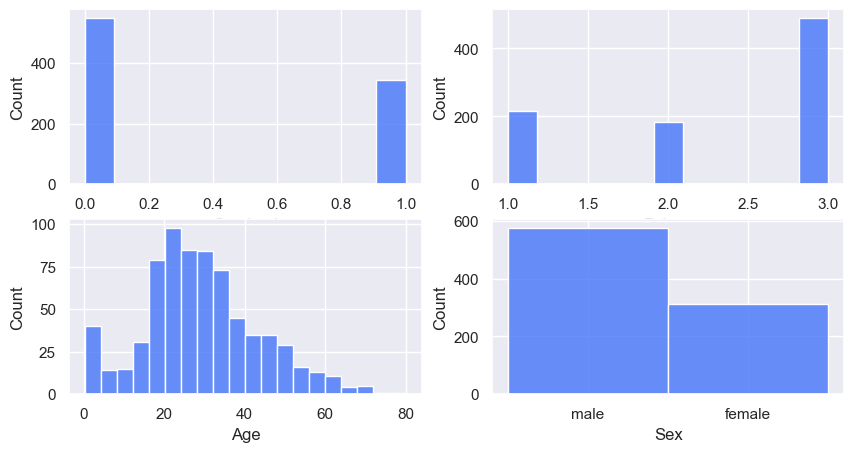

In [12]:
# data visualisation for the data
# Histogram 
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.histplot(data=df['Survived'])
plt.subplot(2,2,2)
sns.histplot(data=df['Pclass'])
plt.subplot(2,2,3)
sns.histplot(data=df['Age'])
plt.subplot(2,2,4)
sns.histplot(data=df['Sex'])

<Axes: ylabel='Age'>

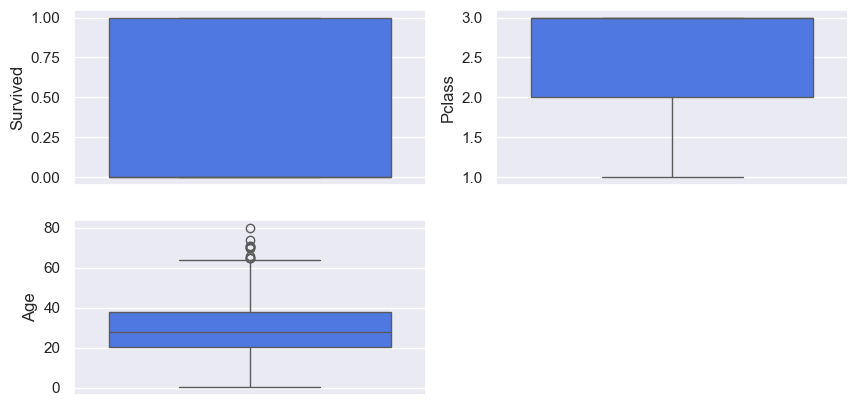

In [13]:
# boxplot
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.boxplot(data=df['Survived'])
plt.subplot(2,2,2)
sns.boxplot(data=df['Pclass'])
plt.subplot(2,2,3)
sns.boxplot(data=df['Age'])


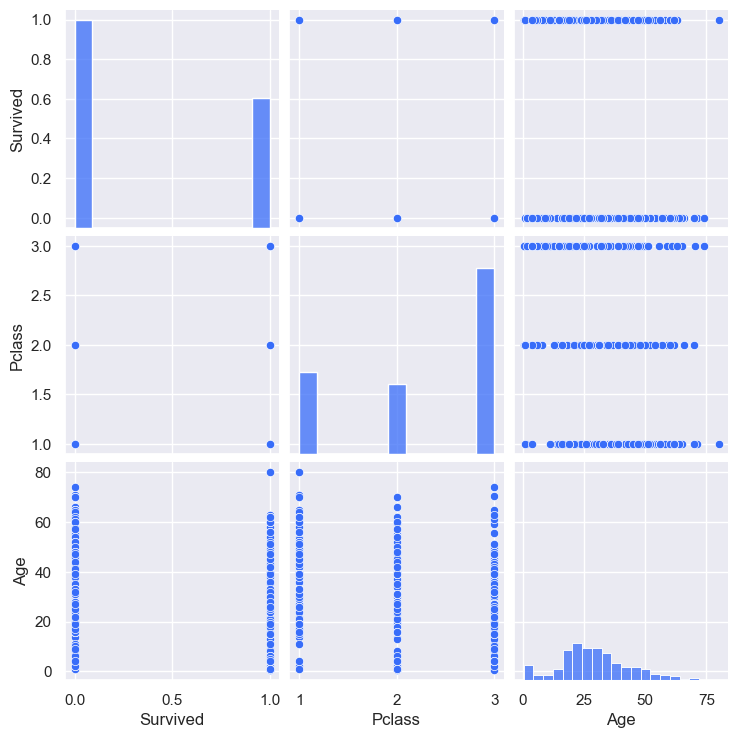

In [14]:
# pairplot
sns.pairplot(df)

from the above ploted graphs we can clearly see that the the age column is little right skewed and has ouliers present in it.
which can be treated else the rest of the column follows uniform distribution 

# 2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.

In [17]:
# finding missing values in each column
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

## IMPUTATION(FILLING THE MISSING VALUES)

In [19]:
# there are missing vlaues in age column which can be replaced by median of age column as the age column have outliers 
# imputing the missing values
df = df.fillna(28) # as the median for age column is 28
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

## ENCODING THE CATEGORICAL VALRIABLES

In [21]:
# WE ARE ENCODING THE CATEGORICAL COLUMN "SEX" AS WELL AS THE "Pclass" as want to perfrom the logistic regression for a better result
df = pd.get_dummies(df, columns=['Sex', 'Pclass'],dtype=int)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


# 3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.

In [23]:
# dividing the data into features and target varaibles
x_train= df.drop('Survived',axis=1)
y_train= df['Survived']

In [24]:
x_train.shape, y_train.shape

((891, 6), (891,))

In [25]:
x_train

,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,1,0,0,1
1,38.0,1,0,1,0,0
2,26.0,1,0,0,0,1
3,35.0,1,0,1,0,0
4,35.0,0,1,0,0,1
...,...,...,...,...,...,...
886,27.0,0,1,0,1,0
887,19.0,1,0,1,0,0
888,28.0,1,0,0,0,1
889,26.0,0,1,1,0,0


In [26]:
# model building 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)       

LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [28]:
# predicted target variable for training dataset
y_train_pred= model.predict(x_train)
y_train_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [29]:
# accuracy of the target variable for training dataset
train_accuracy_score= accuracy_score(y_train,y_train_pred)
print("The Accuracy score for the training dataset is :",train_accuracy_score)

The Accuracy score for the training dataset is : 0.7991021324354658


In [30]:
# confusion matrix
confusion_matrix(y_train_pred,y_train)

array([[473, 103],
       [ 76, 239]])

<Axes: >

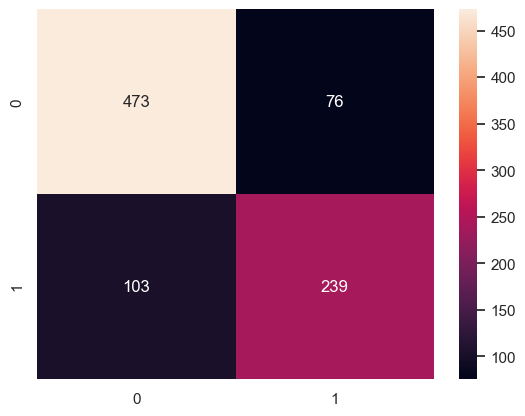

In [31]:
# plotting the confusion matrix
sns.heatmap(confusion_matrix(y_train,y_train_pred), annot=True,fmt='g')

# 4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.

In [33]:
# loading the testing dataset
test_data= pd.read_csv(r"E:\ExcelR CLASSES\DATA SCIENCE 05-07-24 DIPTI SINHA ExcelR\DATA SCIENCE ASSINGMENTS\Logistic Regression\Titanic_test.csv")
test_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\ExcelR CLASSES\\DATA SCIENCE 05-07-24 DIPTI SINHA ExcelR\\DATA SCIENCE ASSINGMENTS\\Logistic Regression\\Titanic_test.csv'

In [ ]:
test_data= test_data[['Pclass','Sex','Age']]
test_data.head()

In [ ]:
test_data.isna().sum()

In [ ]:
test_data.describe()

In [ ]:
test_data= test_data.fillna(27)
test_data.isna().sum()

In [ ]:
test_data= pd.get_dummies(test_data,columns=['Sex','Pclass'],dtype=int)
test_data.head()

In [ ]:
y_test_pred= model.predict(test_data)
y_test_pred